Setting Up: Libraries 

In [132]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image

The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

The training set consists of 28,709 examples

In [129]:
data = pd.read_csv('Data/icml_face_data.csv')
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

EDA for image datasets is challenging because the data primarily consists of pixel values and classifying each emotion, but here is some quick insight into the data

Train dataset size: 28709
Test dataset size: 7178
Image shape: (48, 48)
Class Distribution:
emotion
3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: count, dtype: int64


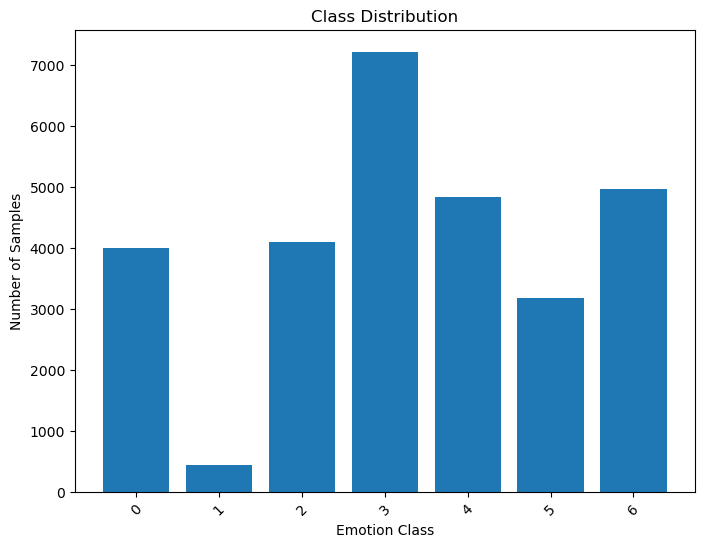

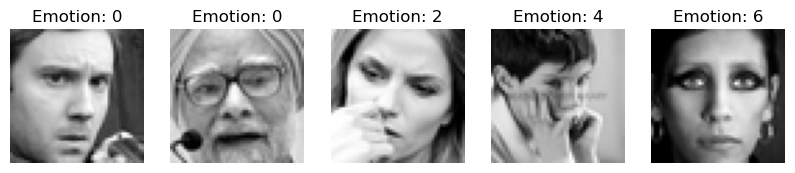

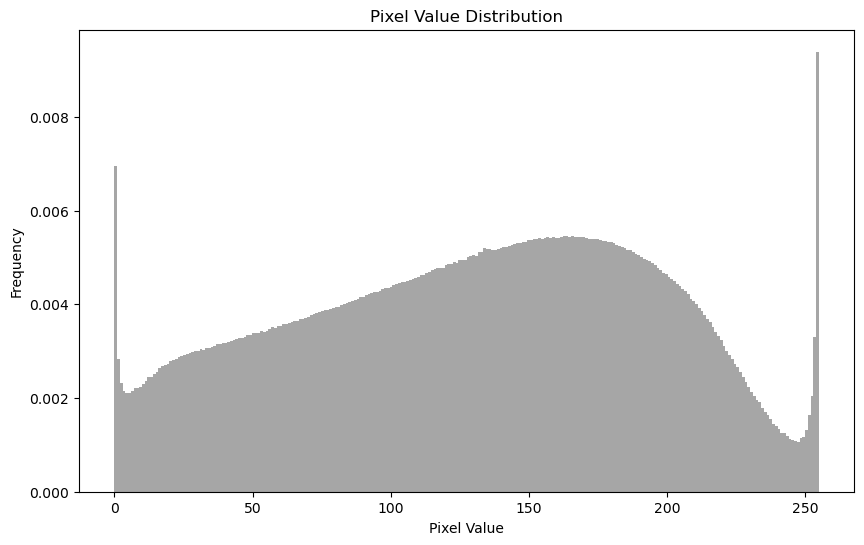

In [122]:
print("Train dataset size:", len(train))
print("Test dataset size:", len(test))

image_shape = (48, 48)  
print("Image shape:", image_shape)

class_distribution = train['emotion'].value_counts()
print("Class Distribution:")
print(class_distribution)

plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel("Emotion Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

sample_indices = [0, 1, 2, 3, 4]  

plt.figure(figsize=(10, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, len(sample_indices), i + 1)
    sample_image = np.fromstring(train['pixels'][idx], dtype=int, sep=' ').reshape(image_shape)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Emotion: {train['emotion'][idx]}")
    plt.axis('off')

plt.show()

pixel_values = np.vstack(train['pixels'].apply(lambda x: np.fromstring(x, sep=' ', dtype=int)))
plt.figure(figsize=(10, 6))
plt.hist(pixel_values.ravel(), bins=256, density=True, color='gray', alpha=0.7)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Pixel Value Distribution")
plt.show()

Load and Preprocess Data

In [18]:
#Extract and preprocess the pixel values

In [16]:
train_pixels = train['pixels'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ') / 255.0)
test_pixels = test['pixels'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ') / 255.0)

In [19]:
#Reshape the pixel arrays

In [17]:
image_size = 48
train_images = np.vstack(train_pixels).reshape(-1, image_size, image_size, 1)
test_images = np.vstack(test_pixels).reshape(-1, image_size, image_size, 1)

In [20]:
#Encode the emotion labels

## Model Training

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [27]:
train_labels = to_categorical(train['emotion'], num_classes=7) 

In [28]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
718/718 [==============================] - 39s 53ms/step - loss: 1.7148 - accuracy: 0.3143 - val_loss: 1.5410 - val_accuracy: 0.4030
Epoch 2/10
718/718 [==============================] - 36s 50ms/step - loss: 1.5471 - accuracy: 0.4007 - val_loss: 1.4170 - val_accuracy: 0.4544
Epoch 3/10
718/718 [==============================] - 34s 48ms/step - loss: 1.4628 - accuracy: 0.4318 - val_loss: 1.3687 - val_accuracy: 0.4875
Epoch 4/10
718/718 [==============================] - 35s 48ms/step - loss: 1.4080 - accuracy: 0.4590 - val_loss: 1.3218 - val_accuracy: 0.4963
Epoch 5/10
718/718 [==============================] - 31s 44ms/step - loss: 1.3644 - accuracy: 0.4756 - val_loss: 1.3102 - val_accuracy: 0.5003
Epoch 6/10
718/718 [==============================] - 33s 45ms/step - loss: 1.3240 - accuracy: 0.4915 - val_loss: 1.3054 - val_accuracy: 0.5098
Epoch 7/10
718/718 [==============================] - 33s 45ms/step - loss: 1.2767 - accuracy: 0.5062 - val_loss: 1.2764 - val_accuracy:

The training loss is relatively low, which suggests that your model is fitting the training data reasonably well. Although, the accuracy is approximately 55.12%, meaning that the model correctly classified about 55.12% of the training examples. While this is better than random guessing, it's not exceptionally high indicating room for improvement.

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, utils

In [53]:
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
718/718 [==============================] - 43s 58ms/step - loss: 1.7677 - accuracy: 0.2732 - val_loss: 1.5785 - val_accuracy: 0.3729
Epoch 2/10
718/718 [==============================] - 44s 61ms/step - loss: 1.5400 - accuracy: 0.4007 - val_loss: 1.4407 - val_accuracy: 0.4411
Epoch 3/10
718/718 [==============================] - 44s 61ms/step - loss: 1.4171 - accuracy: 0.4562 - val_loss: 1.3244 - val_accuracy: 0.4969
Epoch 4/10
718/718 [==============================] - 44s 61ms/step - loss: 1.3470 - accuracy: 0.4877 - val_loss: 1.2619 - val_accuracy: 0.5181
Epoch 5/10
718/718 [==============================] - 44s 62ms/step - loss: 1.2904 - accuracy: 0.5060 - val_loss: 1.2538 - val_accuracy: 0.5275
Epoch 6/10
718/718 [==============================] - 46s 63ms/step - loss: 1.2421 - accuracy: 0.5278 - val_loss: 1.2109 - val_accuracy: 0.5359
Epoch 7/10
718/718 [==============================] - 44s 61ms/step - loss: 1.2032 - accuracy: 0.5425 - val_loss: 1.1892 - val_accuracy:

Adding extra layers and additional inputs improved the model slightly, so may need to take a new approach and try a different dataset or model

## Data contains up to 920 images from 920 original CK+ dataset

## Data is already reshaped to 48x48 pixels, in grayscale format and facecropped using haarcascade_frontalface_default.

In [88]:
data2 = pd.read_csv('ckextended.csv')

In [89]:
pixel_data = data2['pixels'].apply(lambda x: np.fromstring(x, sep=' '))
emotion_labels = data2['emotion']

In [90]:
image_data = np.vstack(pixel_data.to_numpy()).reshape(-1, 48, 48, 1).astype('float32')

In [91]:
image_data /= 255.0

In [94]:
emotion_labels_categorical = to_categorical(emotion_labels, num_classes=8)

X_train, X_test, y_train, y_test = train_test_split(
    image_data,
    emotion_labels_categorical,
    test_size=0.2,  
    random_state=42
)

In [97]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [98]:
history2 = model2.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
19/19 [==============================] - 2s 61ms/step - loss: 1.4726 - accuracy: 0.6003 - val_loss: 1.2330 - val_accuracy: 0.6892
Epoch 2/10
19/19 [==============================] - 1s 46ms/step - loss: 1.3881 - accuracy: 0.6310 - val_loss: 1.1644 - val_accuracy: 0.6892
Epoch 3/10
19/19 [==============================] - 1s 46ms/step - loss: 1.2904 - accuracy: 0.6344 - val_loss: 1.1306 - val_accuracy: 0.6892
Epoch 4/10
19/19 [==============================] - 1s 47ms/step - loss: 1.1033 - accuracy: 0.6735 - val_loss: 0.9508 - val_accuracy: 0.7297
Epoch 5/10
19/19 [==============================] - 1s 57ms/step - loss: 0.9493 - accuracy: 0.7075 - val_loss: 0.8004 - val_accuracy: 0.7635
Epoch 6/10
19/19 [==============================] - 1s 50ms/step - loss: 0.8278 - accuracy: 0.7738 - val_loss: 0.7260 - val_accuracy: 0.7770
Epoch 7/10
19/19 [==============================] - 1s 51ms/step - loss: 0.6750 - accuracy: 0.8095 - val_loss: 0.6808 - val_accuracy: 0.7905
Epoch 8/10
19

In [100]:
history2 = model2.fit(X_train, y_train, epochs=10, validation_split=0.2)

train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

for epoch, (train_acc, val_acc) in enumerate(zip(train_accuracy, val_accuracy), 1):
    print(f'Epoch {epoch} - Training Accuracy: {train_acc:.4f} - Validation Accuracy: {val_acc:.4f}')


Epoch 1/10
19/19 [==============================] - 1s 48ms/step - loss: 0.4727 - accuracy: 0.8571 - val_loss: 0.5191 - val_accuracy: 0.8311
Epoch 2/10
19/19 [==============================] - 1s 52ms/step - loss: 0.4890 - accuracy: 0.8401 - val_loss: 0.4758 - val_accuracy: 0.8311
Epoch 3/10
19/19 [==============================] - 1s 58ms/step - loss: 0.4079 - accuracy: 0.8759 - val_loss: 0.5010 - val_accuracy: 0.8378
Epoch 4/10
19/19 [==============================] - 1s 48ms/step - loss: 0.3430 - accuracy: 0.8963 - val_loss: 0.4601 - val_accuracy: 0.8378
Epoch 5/10
19/19 [==============================] - 1s 48ms/step - loss: 0.3703 - accuracy: 0.8844 - val_loss: 0.5094 - val_accuracy: 0.8176
Epoch 6/10
19/19 [==============================] - 1s 47ms/step - loss: 0.3049 - accuracy: 0.8946 - val_loss: 0.4397 - val_accuracy: 0.8581
Epoch 7/10
19/19 [==============================] - 1s 52ms/step - loss: 0.3048 - accuracy: 0.9048 - val_loss: 0.4344 - val_accuracy: 0.8514
Epoch 8/10
19

In [99]:
model2.save('emotion_model2.h5')

/Users/elidaniels/anaconda3/envs/dsi/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
